# **Proyecto 1  : Relación entre minutos e ingreso**
---

En el presente informe se realiza una exploración de la base de datos de Credito Dias desarrollada por una empresa de telecomunicaciones en la que tiene el registro de 10 mil clientes relacionados con la compañía. Para esto se hace una exploración inicial de los datos, se describen las variables y se hacen análisis de estas de manera independiente y también correlacinandolas para entender patrones de los datos.

En el presente informe se responde a las siguientes preguntas:

- ¿Qué tipo de variables existen?
- ¿Existen registros nulos?
- ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?
- ¿Tener crédito afecta a las otras variables?

### Equipo de trabajo

- Marcela Vásquez
- Omar Avendaño
- Duván Robayo

En la siguiente celda se importan las librerías necesarias: **pandas, numpy, matplotlib y seaborn**.

In [122]:
# IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **0.  Leer el archivo de datos**
---

Vamos a utilizar el dataset Credito_dias.csv que se encuentra en un repositorio en línea y lo cargaremos en el dataframe dfCreditos.

In [123]:
# CARGAMOS EL DATASET DESDE EL ARCHIVO EN LA WEB
#1 Usamos el método read_csv que permite leer archivos csv como un dataframe de pandas.

url = "https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv"

dfCreditos = pd.read_csv(url, index_col="Customer_ID")

In [124]:
#Si desea guardar el archivo en local puede ejecutar este código:

dfCreditos.to_csv("Credito_dias.csv", index= True)

In [125]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres primeras filas usando .head().

dfCreditos.head(3)

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675


In [126]:
# REVISIÓN PREVIA DE LOS DATOS
# Revisamos los datos cargados con solo las tres últimas filas, usando tail(), esto con el fin de revisar previamente la variabilidad de los datos

dfCreditos.tail(3)

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1096497,3690.0,294.29,Y,212
1087248,3333.0,233.08,Y,290
1099003,5025.0,1436.49,Y,1029


## **1. Tipos de variables**
---
En esta sección haremos una revisión de las variables existentes en el dataframe y una descripción detallada de cada una de las columnas.

### **1.0.  Forma de los datos**

Se identifica la forma de los datos que tenemos (filas y columnas) y se exploran los diferentes tipos de variables (columnas) del conjunto de datos.

In [127]:
# REVISIÓN DE LA FORMA DEL DATAFRAME (CANTIDAD DE FILAS Y CANTIDAD DE COLUMNAS)
# Vamos a revisar el número de filas y columnas del dataframe, para saber con qué cantidad de información contamos.
# Usamos el método .shape

print(f"El número de filas del dataset es de: {dfCreditos.shape[0]}")
print(f"El número de columnas del dataset es de: {dfCreditos.shape[1]}")

El número de filas del dataset es de: 10000
El número de columnas del dataset es de: 4


### **1.1.  Tipos de datos de las columnas y registros nulos**

Se identifica las columnas, se hace una revisión de la cantidad de datos no nulos y el tipo de dato por cada columna.

In [128]:
# REVISIÓN GENERAL DEL DATAFRAME
# Este metodo permite mostrar información sobre las columnas y sus tipos de datos, así como un conteo de los valores no nulos.

dfCreditos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1082423 to 1099003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totmou    10000 non-null  float64
 1   totrev    10000 non-null  float64
 2   creditcd  9848 non-null   object 
 3   eqpdays   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


In [129]:
dfCreditos.creditcd.isnull().sum()

152

In [130]:
porcentajeNulos = dfCreditos.creditcd.isnull().sum() * 100 / dfCreditos.shape[0]
print(porcentajeNulos)

1.52


**Notas:**
- Se evidencian tres tipos de datos (float, String, Integer)
- Se observa que la variable creditcd tiene 152 datos nulos, lo que representa el 1.5% de la totalidad de registros.

### **1.2.  Revisión estadística de las variables numéricas**

Se identifican las columnas numéricas, identificando por cada variable el promedio, la desviación estándar, los percentiles y valrores mínimos y máximos.

In [131]:
# DESCRIPCIÓN ESTADÍSTICA DE LOS DATOS NUMÉRICOS
# El método describe nos permite traer varias medidas como: Conteo, Promedio, Desviación Estándar, Percentiles, valor mínimo y valor máximo.

dfCreditos.describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.000000
mean,7692.804866,1042.133807,386.794500
std,8657.917883,857.144895,252.720196
min,0.000000,11.100000,-5.000000
25%,2576.000000,526.787500,210.000000
50%,5262.000000,820.235000,338.000000
75%,9823.250000,1272.975000,522.000000
max,163264.176700,13426.600000,1823.000000


**Notas:**
- Se evidencia que en promedio los clientes usan los equipos 7692 minutos lo que equivale a 128 horas.
- Se observa que en promedio los equipos de los clientes tienen una antiguedad de 386 días, un poco más de un año.
- Se evidencia que hay valores negativos en la variable eqpdays, lo cual no tiene sentido para el análisis ya que un equipo no puede tener días negativos de antiguedad.

### **1.3.  Diccionario de datos**

Se describen cada una de las columnas presentes en este dataframe, proponiendo un nuevo nombre, la definición de estas variables, los valores ejemplo que toman los campos de estas columnas, los tipos de datos y tipos de variable.

El conjunto de datos de CreditoDias cuenta con las siguientes variables:

| Variable | Nuevo Nombre | Definición	| Valores | Tipo de Dato en Python | Tipo de Variable
|:--------:|:------------:|:-----------:|:-------:| --- | --- |
| Customer_ID | IdCliente     | Identificador único del cliente | 1082423 , ... | Integer | Categórica(nominal) |
| totmou   | TotalMinutos | Total de minutos usados por cada cliente | 7269.0, ... | Float | Numérica(continua) |
| totrev | TotalIngresos | Total de ingresos generados por cada cliente | 906.58, ... | Float | Numérica(continua) |
| creditcd | Credito | El cliente tiene o no tiene crédito | "Y" = Si, "N" = No | String | Categórica(nominal) |
| eqpdays | AntiguedadEquipo | Número de días de antiguedad del equipo actual del cliente | 371 , ... | Int | Numérica(discreta) |

### **1.4.  Cambios en columnas**

A continuación se realizan algunos ajustes al dataset con el fin de facilitar las operaciones.

In [132]:
# SIMPLIFACAMOS LOS NOMBRES DE COLUMNAS
# Antes de operar vamos a normalizar los nombres de las columnas para hacer las operaciones más sencillas y entender mejor las variables que estamos manejando.

dfCreditos = dfCreditos.rename(columns={"totmou":"TotalMinutos","totrev":"TotalIngresos",
                                        "creditcd":"Credito", "eqpdays":"AntiguedadEquipo"}).rename_axis(index={"Customer_ID": "IdCliente"})

### **1.5.  Revisión valores nulos**

A continuación vamos a filtrar el dataset con el objetivo de revisar los registros que tienen valores nulos y así tomar una decisión con respecto a estos datos.

In [133]:
# Creamos una máscara de valores nulos
nulos = dfCreditos.isna().any(axis=1)

# Filtramos el dataframe.
df_nulos = dfCreditos[nulos]

In [134]:
df_nulos

,TotalMinutos,TotalIngresos,Credito,AntiguedadEquipo
IdCliente,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


**Notas:**
- Se evidencia que los valores nulos se encuentran en la columna TarjetaCredito, en la que el tipo de dato es categórico booleano.
- Teniendo en cuenta que son datos no numéricos, no podemos hacer imputación de datos con medidas como el promedio o la mediana.
- Tampoco imputaremos con un valor booleano, ya que podríamos imputar valores alejados de la realidad. No tenemos suficiente información para decir que estos clientes tienen o no tienen tarjeta de crédito. Por lo tanto se dejarán estos valores tal cual el dataset original.

### **1.6.  Revisión datos AntiguedadEquipo**

A continuación vamos a imputar los valores negativos de antiguedadEquipo con el promedio de días, para no afectar la distribución de estos datos.

In [135]:
mediaAntiguedad = dfCreditos.AntiguedadEquipo.mean()

In [136]:
for indice, valor in dfCreditos["AntiguedadEquipo"].items():
    if valor < 1:
        dfCreditos.loc[indice, "AntiguedadEquipo"] = mediaAntiguedad


C:\Users\duvan\AppData\Local\Temp\ipykernel_23316\1640968960.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '386.7945' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfCreditos.loc[indice, "AntiguedadEquipo"] = mediaAntiguedad


## **2. Análisis Exploratorio de Datos**
---
En esta sección haremos una revisión de cada una de las variables de este dataset, para identificar comportamientos en los datos y tendencias de los mismos por medio de gráficos que nos permitan evaluar variables numéricas y categóricas.

In [137]:
color1 = "#265C4B"
color2 = "#146551"
color3 = "#007566"
color4 = "#589A8D"
color5 = "#8FC1B5"

### **2.1.  TotalMinutos**

Esta variable numérica nos proporciona información sobre el total de minutos usados por cada cliente, por lo que haremos una revisión de la distribución de los datos para observar en que valores se encuentran la mayoría de los datos.

In [138]:
dfCreditos.TotalMinutos.describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: TotalMinutos, dtype: float64

**Notas:**
- Se evidencia que los el 75% de los minutos se encuentran por debajo de los 9823.
- Se puede determinar que hay valores inusuales como 16 mil minutos, muy por encima de la distribución de los datos.
- En promedio son 7692 minutos usados por los clientes.
- Se puede determinar que existe una variabilidad alta de los datos, con un aproximado de 8657 minutos de variabilidad con respecto a la media.

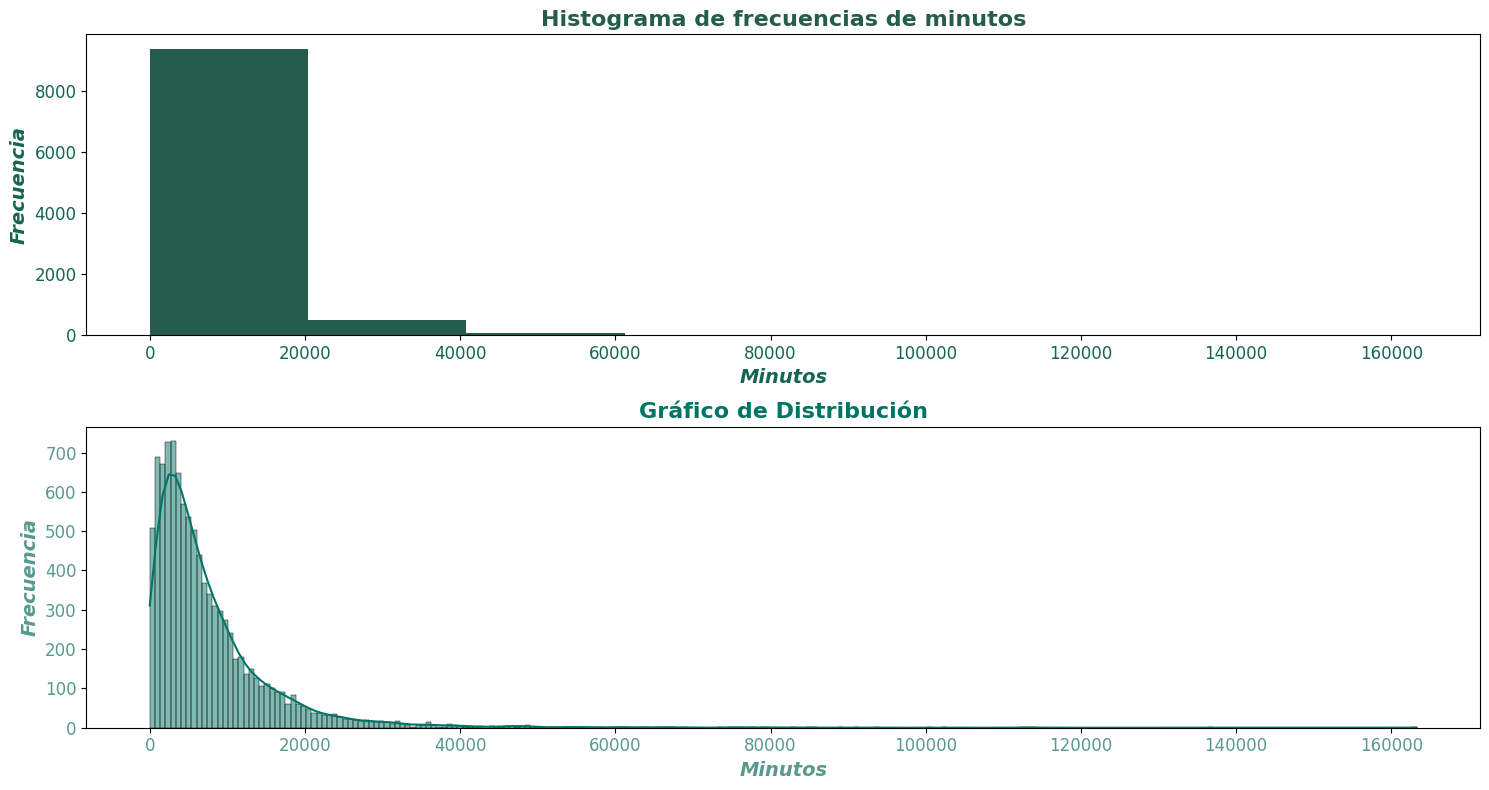

In [139]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

ax1.hist(dfCreditos["TotalMinutos"], bins=8, color=color1)
ax1.set_xlabel("Minutos", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_ylabel("Frecuencia", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_title("Histograma de frecuencias de minutos", fontsize=16, color= color1, fontweight="bold")

sns.histplot(dfCreditos["TotalMinutos"], kde=True, color=color3, ax=ax2)

ax2.set_xlabel("Minutos", fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
ax2.set_ylabel("Frecuencia", fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
ax2.set_title('Gráfico de Distribución', fontsize=16, color= color3, fontweight="bold")

for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax1.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color4)

for tick in ax2.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color4)

plt.tight_layout()
plt.show()

**Notas:**
- Se observa que aproximadamente existen 9500 registros que se encuentran entre 0 y 2000 minutos (33.3 horas),lo que representa la gran mayoría de datos.
- Se observa que los datos siguen una distribución sesgada a la derecha con una larga cola que se extiende a más de 160 mil minutos y esto lo podemos determinar a razón de que la media es mayor que la mediana de los datos.

In [140]:
dfCreditos.columns

Index(['TotalMinutos', 'TotalIngresos', 'Credito', 'AntiguedadEquipo'], dtype='object')

### **2.2.  TotalIngresos**

Esta variable numérica nos proporciona información sobre el total de ingresos generados por cada cliente, por lo que haremos una revisión de la distribución de los datos para observar en que valores se encuentran la mayoría de los datos.

In [141]:
dfCreditos.TotalIngresos.describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: TotalIngresos, dtype: float64

**Notas:**
- Se evidencia que los el 75% de los ingresos se concentran por debajo de los 1272.
- Se puede determinar que hay valores inusuales como 13.426, muy por encima de la distribución de los datos.
- En promedio los clientes generan 1042 de ingresos.
- Se puede determinar que existe una variabilidad alta de los datos, con un aproximado de 857 de variabilidad con respecto a la media.

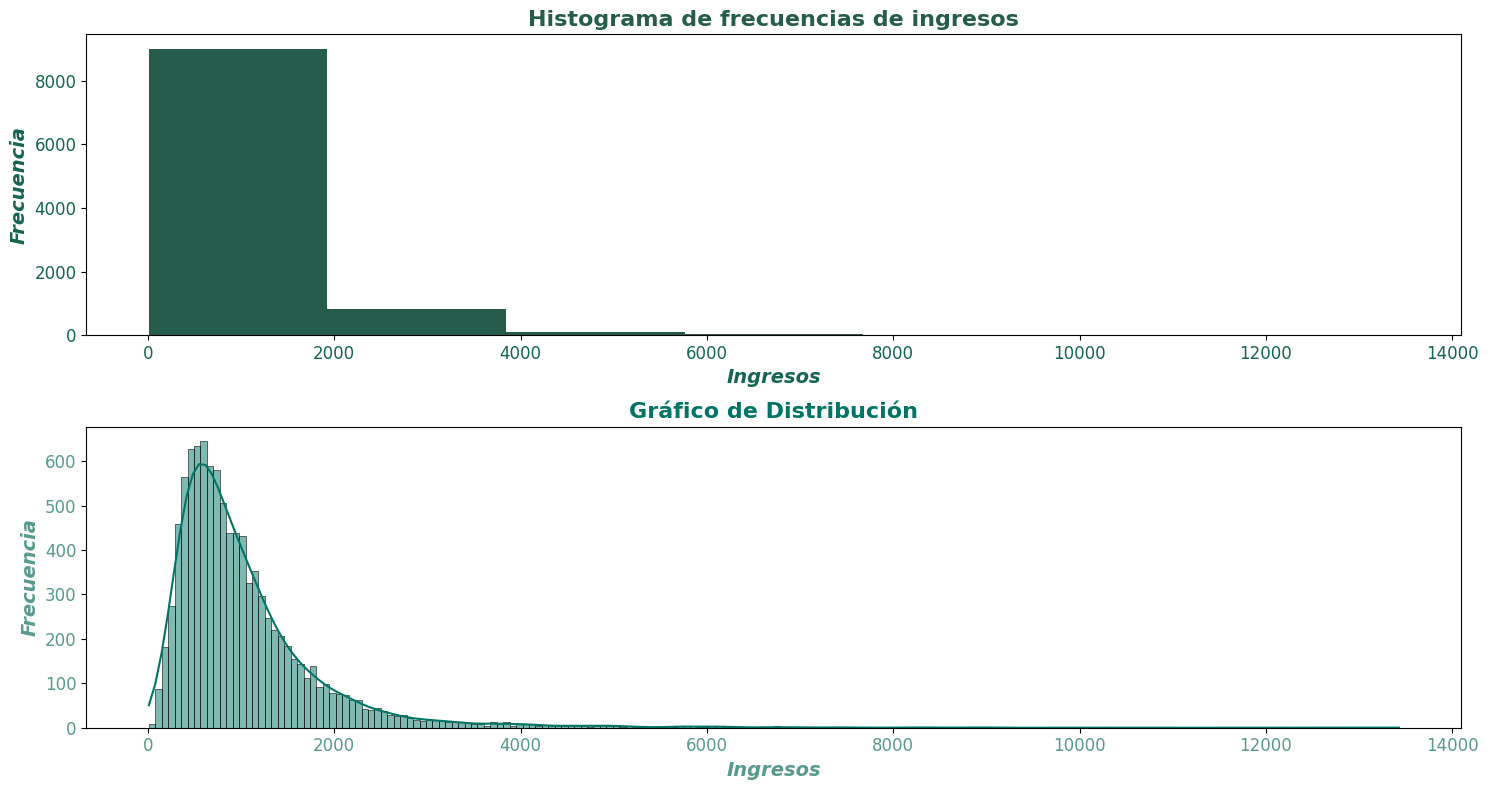

In [142]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

ax1.hist(dfCreditos["TotalIngresos"], bins=7, color=color1)
ax1.set_xlabel("Ingresos", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_ylabel("Frecuencia", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_title("Histograma de frecuencias de ingresos", fontsize=16, color= color1, fontweight="bold")

sns.histplot(dfCreditos["TotalIngresos"], kde=True, color=color3, ax=ax2)

ax2.set_xlabel("Ingresos", fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
ax2.set_ylabel("Frecuencia", fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
ax2.set_title('Gráfico de Distribución', fontsize=16, color= color3, fontweight="bold")

for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax1.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color4)

for tick in ax2.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color4)

plt.tight_layout()
plt.show()

**Notas:**
- Se observa que aproximadamente existen 9000 registros que se encuentran entre 0 y 2000 de ingresos,lo que representa la gran mayoría de datos.
- Se observa que los datos siguen una distribución sesgada a la derecha con una larga cola que se extiende a más de 12 mil y esto lo podemos determinar a razón de que la media es mayor que la mediana de los datos.

### **2.3.  Creditos**

Esta variable categórica nos proporciona información sobre la cantidad de clientes que tienen credito o no con la compañia, por lo que haremos una revisión de la distribución de los datos para observar en que valores se encuentran la mayoría de los datos.

In [143]:
frecCredito = dfCreditos.Credito.value_counts()
frecCredito

Credito
Y    6796
N    3052
Name: count, dtype: int64

**Notas:**
- Se evidencia que la mayoría de clientes cuentan con crédito en la compañía, aproximadamente el 70% de los clientes cuenta con crédito.

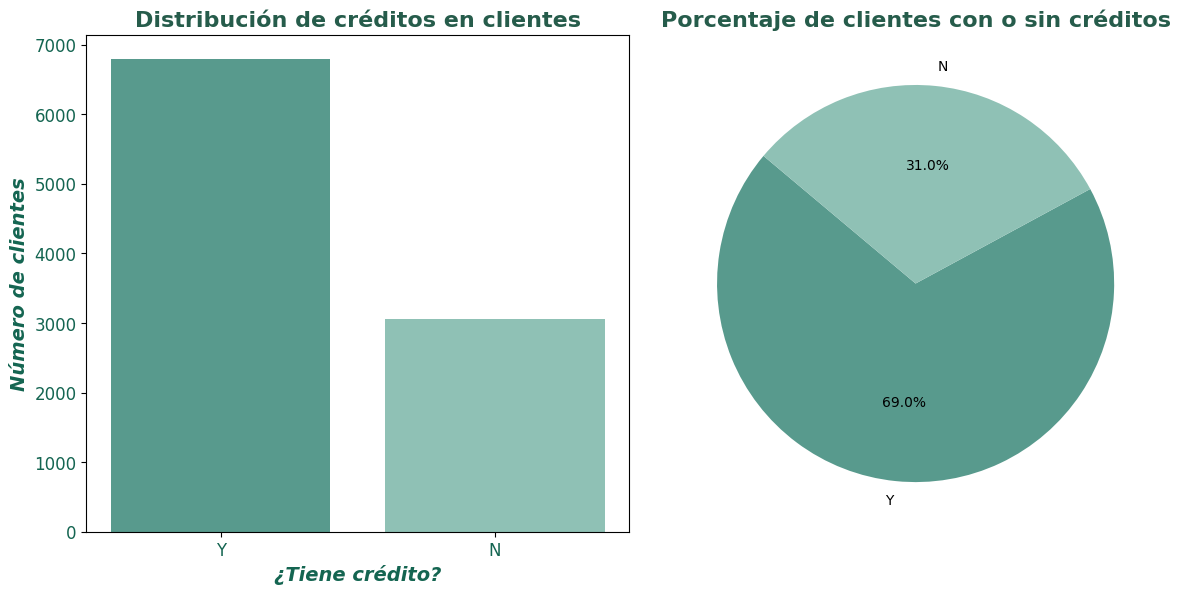

In [144]:
# Creamos el lienzo y sus ejes.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico
ax1.bar(frecCredito.index, frecCredito.values, color=[color4, color5])
ax1.set_xlabel("¿Tiene crédito?", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_ylabel("Número de clientes", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_title("Distribución de créditos en clientes", fontsize=16, color= color1, fontweight="bold")

# Segundo gráfico
ax2.pie(frecCredito.values, labels=frecCredito.index, autopct='%1.1f%%', startangle=140, colors=[color4, color5])
ax2.set_title("Porcentaje de clientes con o sin créditos", fontsize=16, color= color1, fontweight="bold")

# Ajustamos el tamaño de los gráficos
plt.tight_layout()

# Ajustamos las etiquetas de los datos

for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax1.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

# Mostramos el lienzo con ambos gráficos
plt.show()


**Notas:**
- Podemos observar que más de 6 mil clientes cuentan con una línea de crédito con la compañía, lo que equivale al 69% de la población.
- Por otra parte se evidencia que aproximadamente 3 mil clientes no cuentan con líneas de crédito, lo que equivale al 31% de la población.
- Es importante mencionar que aquí solo se tuvieron en cuenta los registros que cuentan con esta información.

### **2.4.  Antiguedad Equipo**

Esta variable numérica nos proporciona información sobre la cantidad de días que el equipo que tiene el cliente está operando, lo que nos permite saber como es la distribución de la cantidad de días de antiguedad que tienen los equipos de los clientes

In [145]:
dfCreditos.AntiguedadEquipo.describe()

count    10000.000000
mean       387.650148
std        252.059394
min          1.000000
25%        211.000000
50%        339.000000
75%        522.000000
max       1823.000000
Name: AntiguedadEquipo, dtype: float64

**Notas:**
- Se evidencia que los el 75% de los equipos tienen una antiguedad menor a 522 días.
- Se puede determinar que hay valores inusuales como 1823 días, muy por encima de la distribución de los datos.
- En promedio la antiguedad de los equipos de los clientes es de 387 días, un poco más de un año.
- Se puede determinar que existe una variabilidad alta de los datos, con un aproximado de 252 días de variabilidad con respecto a la media.

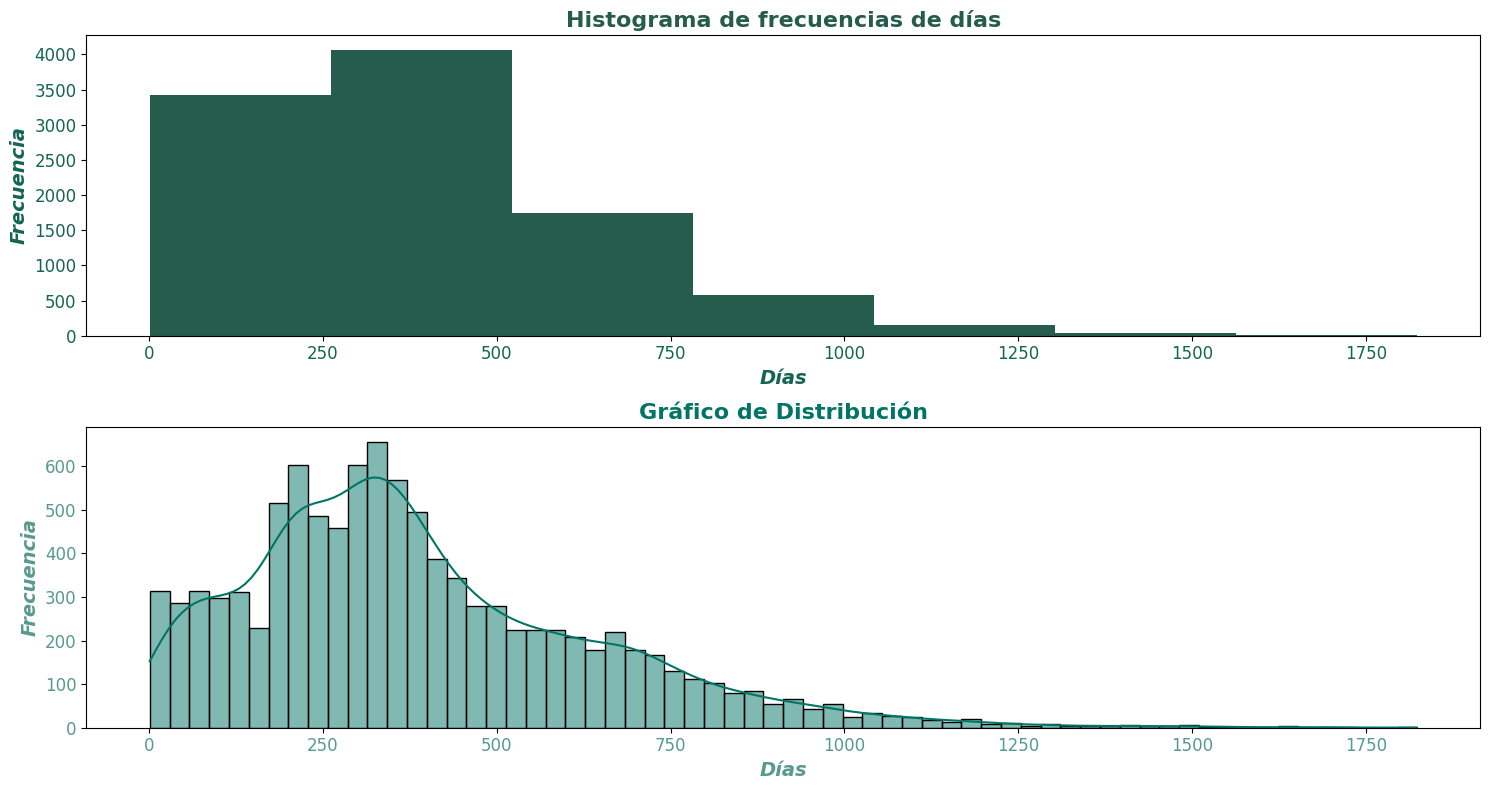

In [153]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

ax1.hist(dfCreditos["AntiguedadEquipo"], bins=7, color=color1)
ax1.set_xlabel("Días", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_ylabel("Frecuencia", fontsize=14, color= color2, fontstyle="italic", fontweight="bold")
ax1.set_title("Histograma de frecuencias de días", fontsize=16, color= color1, fontweight="bold")

sns.histplot(dfCreditos["AntiguedadEquipo"], kde=True, color=color3, ax=ax2)

ax2.set_xlabel("Días", fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
ax2.set_ylabel("Frecuencia", fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
ax2.set_title('Gráfico de Distribución', fontsize=16, color= color3, fontweight="bold")

for tick in ax1.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax1.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color2)

for tick in ax2.get_xticklabels():
    tick.set_fontsize(12)
    tick.set_color(color4)

for tick in ax2.get_yticklabels():
    tick.set_fontsize(12)
    tick.set_color(color4)

plt.tight_layout()
plt.show()

**Notas:**
- Se observa que aproximadamente existen 4000 registros que indican que la antiguedad de los equipos están entre 250 y 500 días,lo que representa la gran mayoría de datos.
- Se observa que los datos siguen una distribución sesgada a la derecha con una larga cola que se extiende a más de 1750 días, lo que equivale a más de 4 años de antiguedad de los equipos y esto lo podemos determinar a razón de que la media es mayor que la mediana de los datos.

## **3. Análisis de relaciones**
---
En esta sección haremos una revisión de las relaciones entre variables para determinar si una variable afecta a otras variables, para esto harémos gráficos y una matriz de correlación.

### **3.1.  Matriz de correlación**

Creamos una matriz de correlación que nos permita establecer el nivel de relación entre las variables, pero antes de eso normalizamos los valroes de Credito, reemplazando Y por 1 y N por 0.

In [169]:
# Creamos un bucle para reemplazar los valores.
for indice, valor in dfCreditos["Credito"].items():
    if valor == "Y":
        dfCreditos.loc[indice, "Credito"] = 1
    elif valor == "N":
        dfCreditos.loc[indice, "Credito"] = 0
    else:
        pass

In [163]:
# Creamos la matriz de correlación usando el método corr()
matrizCorrelacion = dfCreditos.corr()
matrizCorrelacion

,TotalMinutos,TotalIngresos,Credito,AntiguedadEquipo
TotalMinutos,1.000000,0.835485,-0.045701,-0.107330
TotalIngresos,0.835485,1.000000,0.004963,0.064253
Credito,-0.045701,0.004963,1.000000,0.119183
AntiguedadEquipo,-0.107330,0.064253,0.119183,1.000000


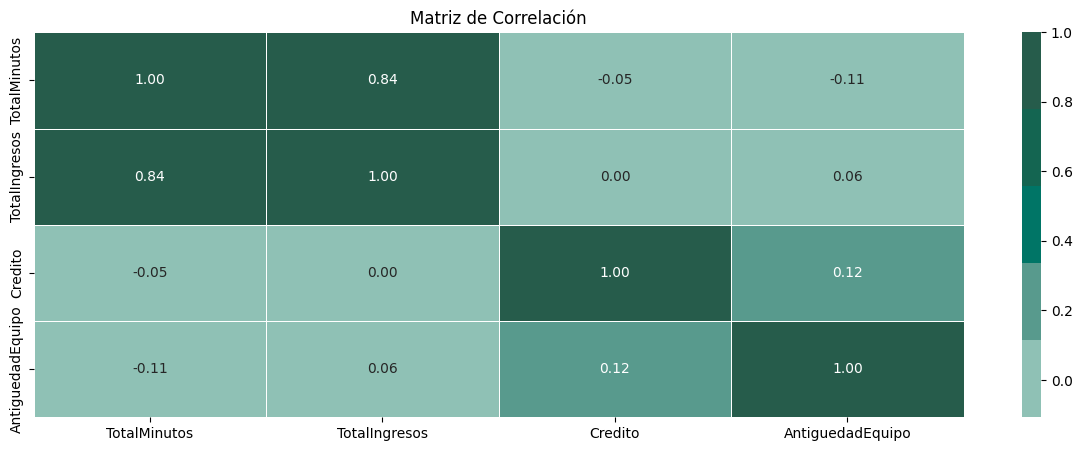

In [170]:
# Creamos un mapa de calor que nos permite identificar las relaciones entre los datos.
plt.figure(figsize=(15, 5))
sns.heatmap(matrizCorrelacion, annot=True, cmap=[color5, color4, color3, color2, color1], fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

**Notas:**
- Se observa una fuerte correlación entre las variables totalMinutos y totalIngresos, con un valor de 0.84 lo que permite identificar que a medida que aumenta el total de ingresos aumenta el total de minutos.
- En las demás variables no se observan relaciones fuertes, incluso en algunos casos se observan correlaciones negativas pero no significantes para el análisis.

### **3.2.  Relación entre TotalMinutos y TotalIngresos**

Teniendo en cuenta que en la anterior matriz identificamos una alta relación positiva entre estas dos variables, realizaremos un análisis con un gráfico de dispersión para observar las tendencias de los datos.

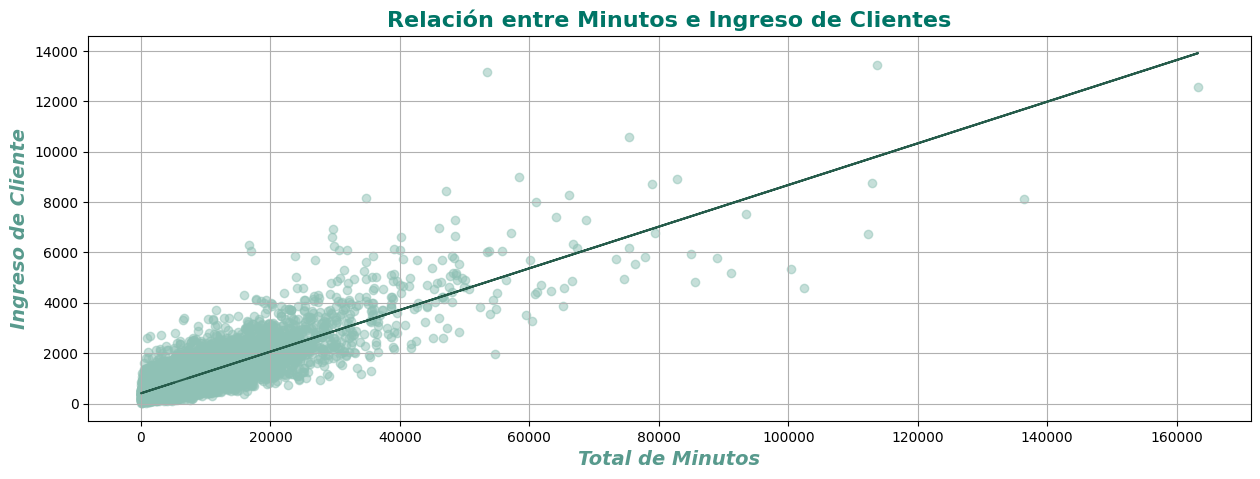

In [171]:
# Creamos un grafico de dispersión que nos indique con puntos la tendencia de los valores en las dos variables
plt.figure(figsize=(15, 5))
plt.scatter(dfCreditos["TotalMinutos"], dfCreditos["TotalIngresos"], color=color5, alpha=0.5)
plt.title('Relación entre Minutos e Ingreso de Clientes', fontsize=16, color= color3, fontweight="bold")
plt.xlabel('Total de Minutos',fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
plt.ylabel('Ingreso de Cliente', fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
plt.grid(True)

# Creamos una línea de regresión que nos permita resumir lo que sucede con los datos.

m, b = np.polyfit(dfCreditos["TotalMinutos"], dfCreditos["TotalIngresos"], 1)
plt.plot(dfCreditos["TotalMinutos"], m * dfCreditos["TotalMinutos"] + b, color=color1)

plt.show()

In [173]:

# Determinamos el valor de la pendiente.
X = dfCreditos["TotalMinutos"].values.reshape(-1, 1) 
Y = dfCreditos["TotalIngresos"].values

# Calculamos la pendiente
m, b = np.polyfit(X.flatten(), Y, 1)

# Imprimimos la pendiente
print("La pendiente de la relación entre minutos e ingresos es:", m)


La pendiente de la relación entre minutos e ingresos es: 0.08271403852113392


**Notas:**
- De acuerdo a la línea de regresión existe suficiente evidencia para determinar que existe una alta relación entre el total de minutos y el ingreso de los clientes, por lo cual se puede asegurar que existe una relación positiva entre estas dos variables.
- Se observa que la mayoría de los datos se concentran en la primera parte del gráfico con minutos que oscilan entre 0 y 4000 así como ingresos que oscilan ente 0 y 8000. Determinando que en las dos variables existen valores alejados de la distribución de los datos, pero que presentan la misma tendencia: sí uno aumenta el otro aumenta.
- En promedio por cada minuto utilizado, el ingreso de los clientes aumenta en aproximadamente 0.08 unidades.

### **3.2.  Relación entre TotalMinutos y TotalIngresos con respecto a si tiene crédito o no**

Teniendo en cuenta que en el anterior gráfico identificamos una alta relación positiva entre estas dos variables, realizaremos un análisis incluyendo la variable de si tiene crédito o no.

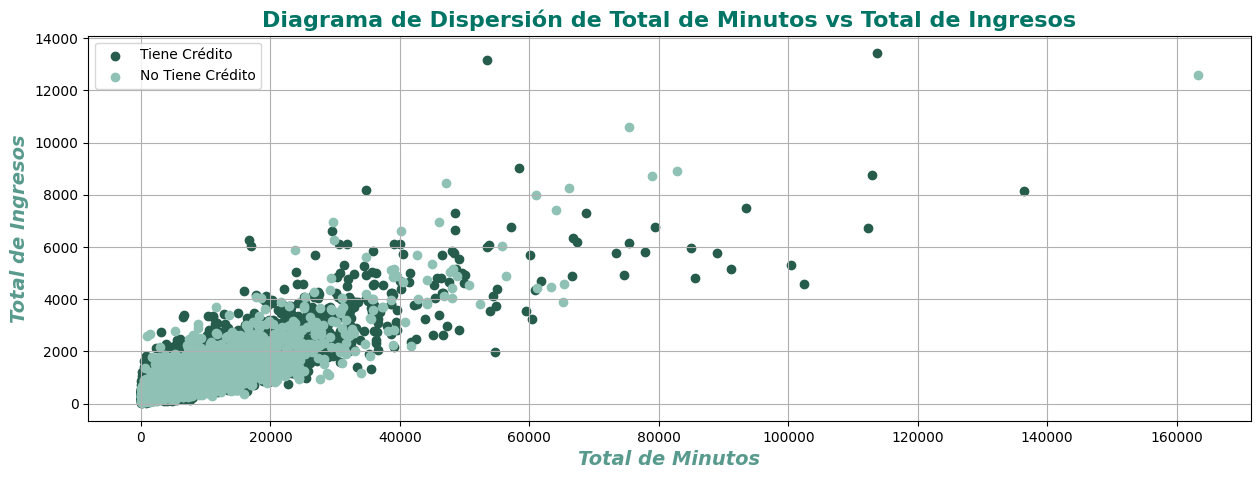

In [177]:
# Separamos los datos con respecto a si el cliente tiene credito o no.
tiene_credito = dfCreditos[dfCreditos["Credito"] == 1]
no_tiene_credito = dfCreditos[dfCreditos["Credito"] == 0]

# Graficamos el diagrama de dispersión incluyendo una leyenda de esa separación de los datos.
plt.figure(figsize=(15, 5))
plt.scatter(tiene_credito["TotalMinutos"], tiene_credito["TotalIngresos"], color=color1, label='Tiene Crédito')
plt.scatter(no_tiene_credito["TotalMinutos"], no_tiene_credito["TotalIngresos"], color=color5, label='No Tiene Crédito')
plt.title('Diagrama de Dispersión de Total de Minutos vs Total de Ingresos', fontsize=16, color= color3, fontweight="bold")
plt.xlabel('Total de Minutos', fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
plt.ylabel('Total de Ingresos', fontsize=14, color= color4, fontstyle="italic", fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()


**Notas:**
- No hay suficiente evidencia para determinar que el crédito tiene alguna relación con los minutos o los ingresos de los clientes.
- Esto tampoco se evidencia en la matriz de correlación presentada anteriormente.